# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,6)})
#sns.set_style('darkgrid')
#sns.set_palette('pastel')

## Load data 

In [2]:
heart_disease_link = 'https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv'
df = pd.read_csv(heart_disease_link)
#print(df.info()), print(df.columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
def eda(dataframe):
    # Checks for the null values.
    print("Missing values \n{}".format(dataframe.isnull().sum()))
    print("Total missing values  {}".format(dataframe.isnull().sum().sum())) 
    # Checks the data frame range size.
    print("\nData index {}".format(dataframe.index))
    # Checks for data types of the columns within the data frame.
    print("\nData types \n{}".format(dataframe.dtypes))
    # Checks the shape of the data frame.
    print("\nShape {}".format(dataframe.shape))
    # Gives us any statistical information of the data frame.
    print("\nDescribe \n{}".format(dataframe.describe()))
    # Gives us the duplicated data of the data frame. 
    print("\nDuplicates \n{}".format(dataframe[dataframe.duplicated()].sum()))
    # A for loop that does this for every single column & their 
    # values within our data frame giving us all unique values.
    print('\nUnique Values Count')
    for item in dataframe:
        print(item, dataframe[item].nunique())
    print('\nUnique Values')   
    for item in dataframe:
        print(item,'\n',dataframe[item].unique())
       
# Let's apply this function to our entire data frame.
eda(df)
#sns.heatmap(df.isnull(),yticklabels=False,cmap='cividis')
#sns.pairplot(df,diag_kind='hist')

Missing values 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Total missing values  0

Data index RangeIndex(start=0, stop=303, step=1)

Data types 
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Shape (303, 14)

Describe 
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000 

In [4]:
# Let's find out how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

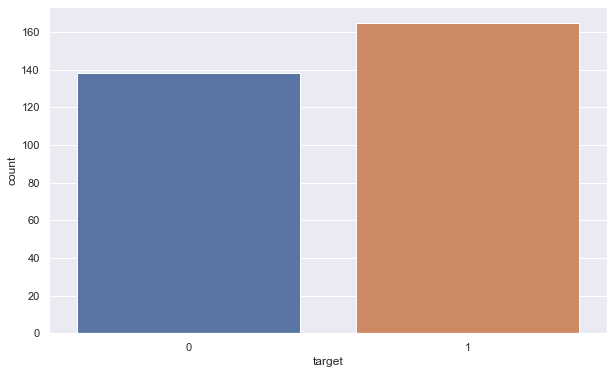

In [5]:
sns.countplot(data=df, x='target');

### Heart Disease Frequency according to Sex 

In [6]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [7]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])


sex,0,1
target,,
0,24,114
1,72,93


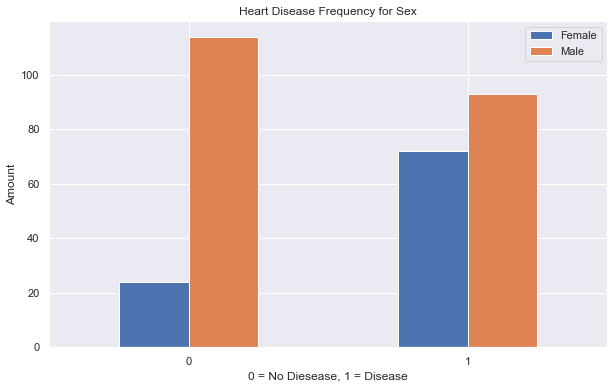

In [8]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6))

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

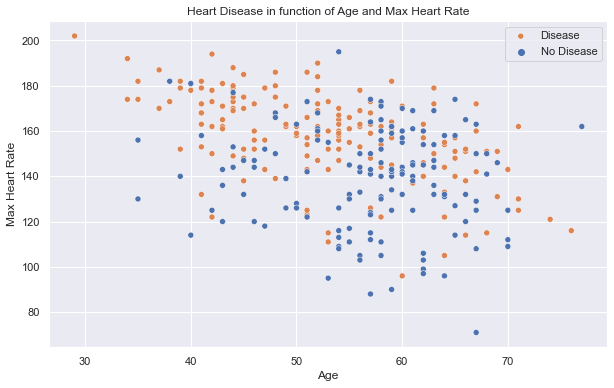

In [9]:
sns.scatterplot(data=df, x='age' , y='thalach' , hue='target')
# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

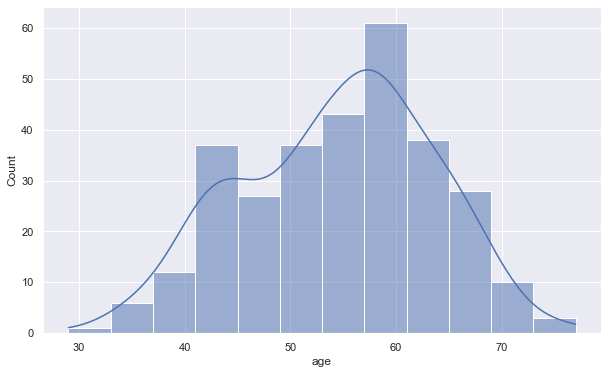

In [10]:
# Check the distribution of the age column with a histogram
sns.histplot(data=df.age , kde=True);

### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [11]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


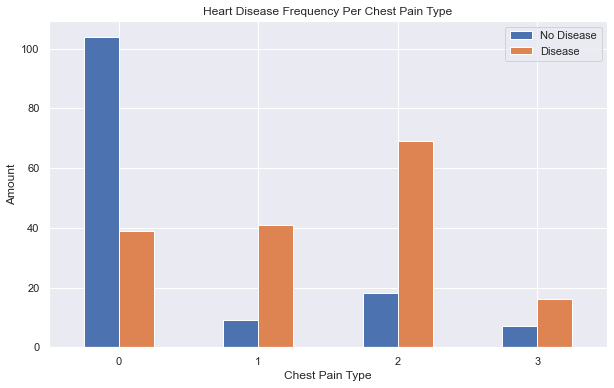

In [12]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6))

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


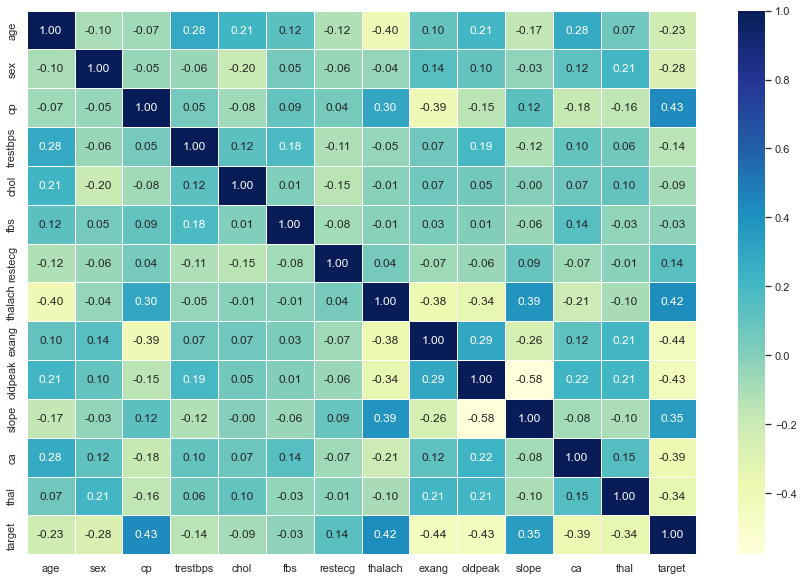

In [14]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

## 5. Modelling 

In [15]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectFromModel

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
#np.random.seed(42)

In [16]:
print(df.columns)
df.head()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Setup random seed
import numpy as np
np.random.seed(42)

# Define different features and transformer pipelines

numeric_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
        ])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        #('feature selection', SelectFromModel(GradientBoostingClassifier())),
                        #("feature scaling", StandardScaler()),
                        ("model", LogisticRegression())])

# Split data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)


# Make baseline predictions
y_preds = model.predict(X_test)
y_probs = model.predict_proba(X_test)

model.score(X_test, y_test)

C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

3.9635185762966487
0.8841594827586207


,0,1,accuracy,macro avg,weighted avg
precision,0.892857,0.878788,0.885246,0.885823,0.885477
recall,0.862069,0.906250,0.885246,0.884159,0.885246
f1-score,0.877193,0.892308,0.885246,0.884750,0.885122
support,29.000000,32.000000,0.885246,61.000000,61.000000


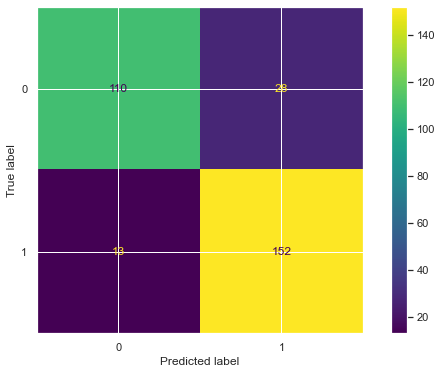

In [18]:
# Different classification metrics
from sklearn.metrics import log_loss
print(log_loss(y_test,y_preds))
# Reciver Operating Characteristic (ROC curve)/Area under curve (AUC)
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probs[:, 1])
print(roc_auc_score(y_test, y_preds))

# Confusion matrix
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test, y_preds))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=model , X=X, y=y);

# Classification report
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y_test, y_preds,output_dict=True))

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [22]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

### Model Comparison

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression 
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

RandomForestClassifier(): 0.802381 (0.146017)
GradientBoostingClassifier(): 0.702381 (0.181406)
KNeighborsClassifier(): 0.623810 (0.163854)
LogisticRegression(max_iter=2000): 0.819048 (0.138914)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...): 0.819048 (0.117224)


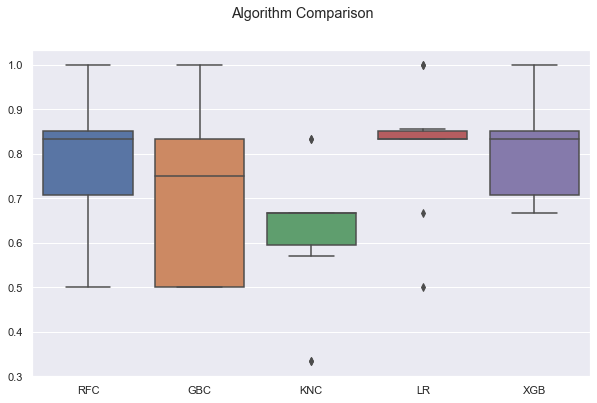

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
np.random.seed(42)
pipelines = []
pipelines.append(('RFC' , (Pipeline([('RFC' ,RandomForestClassifier(n_estimators=100))]))))
pipelines.append(('GBC' , (Pipeline([('GBC' ,GradientBoostingClassifier())]))))
pipelines.append(('KNC' , (Pipeline([('KNC' ,KNeighborsClassifier())]))))
pipelines.append(('LR' , (Pipeline([('LR' ,LogisticRegression(max_iter=2000))]))))
pipelines.append(('XGB' , (Pipeline([('XGB' ,xgb.XGBClassifier())]))));

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X_test ,y_test ,cv =kfold, scoring=None)
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model[0], crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(model_name);

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:
* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict
    
baseline_metrics = evaluate_preds(y_test, y_preds)

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


## Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* KNeighborsClassifier()

... using RandomizedSearchCV

In [25]:
# Hyperparameter tuning pick best model
clf = xgb.XGBClassifier()
clf.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [26]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid

grid_1 = {'max_depth': ["max_depth", 3, 18, 1],
        'gamma': ['gamma', 1,9],
        'min_child_weight' : ['min_child_weight', 0, 10, 1],
    }
# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid_1, 
                            n_iter=25, # number of models to try
                            cv= 5,
                            verbose=1,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);
#rs_clf.score(X_test, y_test)
# Find the best hyperparameters
print(rs_clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
{'min_child_weight': 10, 'max_depth': 18, 'gamma': 1}


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pac

In [27]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_clf.predict(X_test)
# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 86.89%
Precision: 0.88
Recall: 0.88
F1 score: 0.88


## Hyperparamter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [28]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
# Setup grid-2 (refined version of grid)
grid_2 = {'max_depth': ["max_depth", 3, 18, 1],
        'gamma': ['gamma', 1,9],
        'min_child_weight' : ['min_child_weight', 0, 10, 1],
    }

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_1, 
                      cv=10,
                      verbose=1,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train) # 'gs' is short for GridSearch
# Find best parameters of GridSearchCV
print(gs_clf.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
{'gamma': 1, 'max_depth': 1, 'min_child_weight': 10}


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-p

In [29]:
# Evaluate GridSearchCV model
gs_y_preds = gs_clf.predict(X_test)
# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


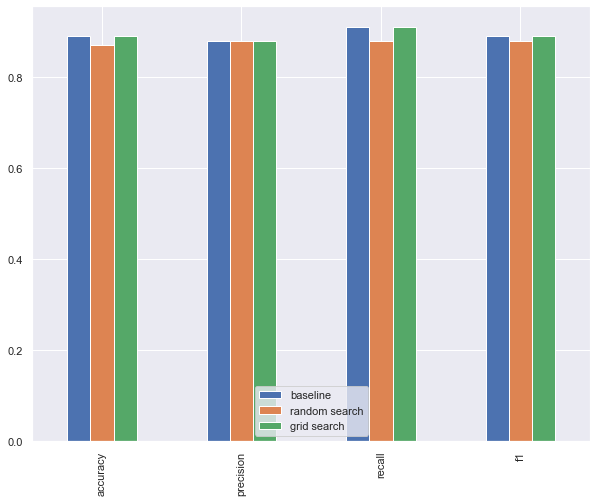

In [30]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
                            
compare_metrics.plot.bar(figsize=(10, 8));

Now we've tuned XGBClassifier() let's do the same for LogisticRegression()...

In [31]:
# Hyperparameter tuning pick best model
lr = LogisticRegression()
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## Hyperparameter tuning with RandomizedSearchCV

In [32]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters grid
grid = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }

# Setup RandomizedSearchCV
rs_lr = RandomizedSearchCV(estimator=lr,
                            param_distributions=grid, 
                            n_iter=25, # number of models to try
                            cv= 10,
                            verbose=1,
                            random_state=42, # set random_state to 42 for reproducibility
                            refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_lr.fit(X_train, y_train);
#rs_clf.score(X_test, y_test)
# Find the best hyperparameters
print(rs_clf.best_params_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:352: Conve

{'min_child_weight': 10, 'max_depth': 18, 'gamma': 1}


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
# Evaluate RandomizedSearch model
rs_y_preds = rs_lr.predict(X_test)
# Evaluate the classifier on validation set
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


## Hyperparamter Tuning with GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)
# Setup grid-2 (refined version of grid)
grid_1 = {'C' : np.logspace(-4,20),
    'solver' : ['lbfgs','newton-cg'],
    #'max_iter' : [100, 1000,2500, 5000]
    }

# Setup GridSearchCV
gs_lr = GridSearchCV(estimator=lr,
                      param_grid=grid_1, 
                      cv=5,
                      verbose=1,
                      refit=True) # set refit=True (default) to refit the best model on the full dataset

# Fit the GridSearchCV version of clf
gs_lr.fit(X_train, y_train) # 'gs' is short for GridSearch
# Find best parameters of GridSearchCV
print(gs_lr.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jimmy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

{'C': 0.2682695795279725, 'solver': 'newton-cg'}


In [35]:
# Evaluate GridSearchCV model
gs_y_preds = gs_lr.predict(X_test)
# Evaluate the classifier on validation set
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


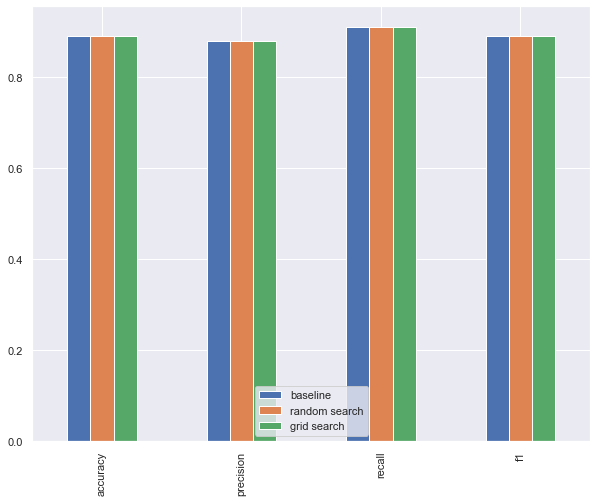

In [36]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
                            
compare_metrics.plot.bar(figsize=(10, 8));

## Evaluting our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


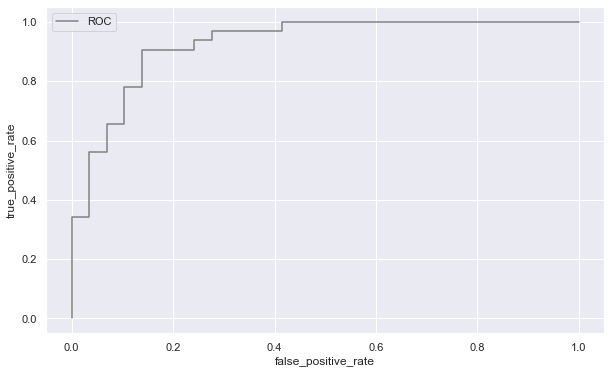

In [37]:
#  plot roc curve
def plot_roc_curve(false_positive_rate,true_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate, color='grey', label='ROC')
    #plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.legend()
    plt.show()

plot_roc_curve(false_positive_rate, true_positive_rate)

### Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [38]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [39]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

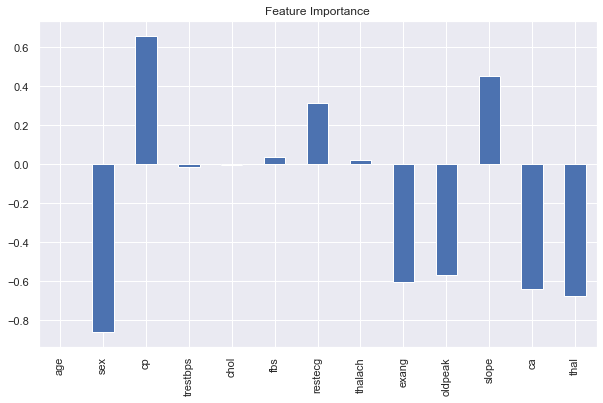

In [42]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [43]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [44]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?